# Привет уважаемый соискатель!
 Тебе предстоит пройти пару простых заданий по глубокому обучению. Это нормально не всегда понимать сразу как
 сделать ту или иную часть, видь у тебя есть возможность разобраться во всём самому! А этот навык куда ценнее
 знаний.
 Отметим сразу, что весь код написанный нами, есть лишь один из возможных путей решения задачи и ты не обязан ему
 следовать. Возможно, ты решишь использовать другие, более удобные, решения. Но как и в случае использования
 наших подсказок, так и без них, мы рекомендуем понимать, что ты пишешь и зачем. Мы будем спрашивать на собесе!
 Но ты не пугайся) Лучше разберись что и как.

In [3]:
import pandas as pd
import torch
from torch.utils.data import Dataset
import torch.nn as nn
from tqdm import tqdm

In [45]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, Normalizer

# Задания и оценивание
В тестировании присутствует 3 части:
- Составление датаеста
- Конструкция архитектуры нейросети
- Обучение и аналитика

Каждая из них представляет собой важный этап работы Ml-щика нашей команды, поэтому постарайся сделать их все.
Все они приносят равное количество баллов. В каждой части есть задание со звёздочкой, его делать не обязательно -
 но если ты всё-таки его сделаешь, то это поможет нам оценить твои компетенции.


Скажем пару слов о данных. Признаки представляют из себя из себя 11 непрерывных переменных, таргет - целочисленную оценку от 1 до 10. Подумай, что это за тип задачи.

In [4]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)

seed_everything(123456)

# Составление датаеста

- Загрузи данные из файла our data. (тут тебе может помочь библиотека pandas)
- Раздели их по переменным X и Y.
- Сконструируй класс MyDataset. (про такого функионал класса можешь почитать [тут](https:pytorch.org/tutorials/beginner/basics/data_tutorial.html))

- "*" Импортируй линейную регрессию из библиотеки sklearn и обучи её на тех же данных. Ура! теперь у нас есть безлайн!


Загрузите данные и разделите на X, Y

In [5]:
data = pd.read_csv('my_data.csv', delimiter = ';') # что-то связанное с csv файлом
print(data.head())
X = data.drop('target', axis = 1).values
Y = data['target'].values

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        7.4       0.70       0.00        1.9      0.076       11.0   
1        7.8       0.88       0.00        2.6      0.098       25.0   
2        7.8       0.76       0.04        2.3      0.092       15.0   
3       11.2       0.28       0.56        1.9      0.075       17.0   
4        7.4       0.70       0.00        1.9      0.076       11.0   

   feature_7  feature_8  feature_9  feature_10  feature_11  target  
0       34.0     0.9978       3.51        0.56         9.4       5  
1       67.0     0.9968       3.20        0.68         9.8       5  
2       54.0     0.9970       3.26        0.65         9.8       5  
3       60.0     0.9980       3.16        0.58         9.8       6  
4       34.0     0.9978       3.51        0.56         9.4       5  


In [6]:
data[:][:1]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=10000
)
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)


Создайте класс DataSet - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [9]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [10]:
train_dataset = MyDataset(x_train, y_train)
test_dataset = MyDataset(x_test, y_test)

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

#baseline model:

In [12]:
#линейная регрессия
baseline = LinearRegression()
baseline.fit(x_train, y_train)
preds = baseline.predict(x_test)
preds = torch.tensor(preds, dtype = torch.int64)
mean_squared_error(y_test, preds)

0.73125

In [13]:
#Однако перед нами стоит задача классификации, поэтому попробуем логистическую регрессию в качествве бейзлафна:
baseline1 = LogisticRegression()
baseline1.fit(x_train, y_train)
preds = baseline1.predict_proba(x_test)
preds = torch.tensor(preds, dtype = torch.int64)
print('log loss:', log_loss(y_test, preds))

log loss: 1.7917594692280547


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Сконструируйте класс нейронной сети
В этом задании тебе предстоит сконструировать полносвязную двухслойную нейронную сеть.

- Вспомните какие сущности необходимы для обучения нейронной сети и включите их в атрибуты класса.
- Основываясь на типе данной задачи выберете подходящую лосс функцию.
- На основе требований первых двух пунктов заполните методы forward и training_step
- "*" Настрой обучение батчами (это не обязательно делать в противном случае)

Напоминаем, что не обязательно пользоваться предлагаемым шаблоном! Если вы знаете более быстрые и простые пути,
то будет интересно на них посмотреть.

In [14]:
class MyNet(nn.Module):
    def __init__(self, lr, p): #тут должны дополнительно передаваться какие-то параметры
        super().__init__()

        # тут должно быть что-то про устройство сети
        self.lin1 = nn.Linear(11, 100)
        self.relu = nn.LeakyReLU()
        #self.drop = nn.Dropout(p)
        self.norm = nn.BatchNorm1d(100)
        self.lin2 = nn.Linear(100, 10)

        self.optimizer = torch.optim.SGD(self.parameters(), lr=lr)
        self.loss = torch.nn.CrossEntropyLoss()

    def forward(self, x):
        """
        Прямой проход по всем слоям сети для получения предсказания.
        :param x:
        Входящие данные.
        :return:
        Предсказанные значения для входящих данных.
        """
        pred = self.lin1(x)
        pred = self.relu(pred)
        pred = self.norm(pred)
        #pred = self.drop(pred)
        pred = self.lin2(pred)

        return pred

    def training_step(self, x, y):
        """
        Реализация одного шага обучения.
        :param train_data:
        Данные для прохода.
        :return:
        Значение лосс функции этого шага обучения.
        """

        preds = self.forward(x)
        #print(preds)
        loss = self.loss(preds, y)
        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()

        return loss

    def val_step(self, x, y):
      preds = self.forward(x)
      loss = self.loss(preds, y)
      return loss




In [15]:
 def plot(val_losses, train_losses):
    #fig, axs = plt.subplots(1, figsize=(15, 5))
    plt.plot(val_losses)
    plt.plot(train_losses)

    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val', 'train'])
    plt.show()

# Обучение и аналитика
В этом задании тебе предстоит обучить сконструированную архитектуру.

- Создай объект класса MyDataset и MyNet, а также других атрибутов, если ваше решение их предусматривает.
- Напишите цикл обучения нейронной сети.
- Обучите нейронную сеть и оцените финальной качество на валидационном датасете.
- "*" Каждый N-ый шаг изображайте на графике, как менялось значение лосс функции на тестовых данных и
на части валидационных данных.

In [16]:
val_losses = []
train_losses = []
n_epochs = 500
def training(model):
  seed_everything(12345)
  val_losses = []
  train_losses = []
  for epoch in tqdm(range(n_epochs)):
      model.train()
      for x, y in train_dataloader:
        #print(x)
        l1 = model.training_step(x, y)

      model.eval()
      with torch.no_grad():
        for x, y in val_dataloader:
          #print(x)
          l = model.val_step(x, y)

      train_losses.append(l1.data)
      val_losses.append(l.data)
  plot(val_losses, train_losses)
  print('val_loss:', val_losses[-1])
  print('train_loss:', train_losses[-1])
    #clear_output()

100%|██████████| 500/500 [00:12<00:00, 39.42it/s]


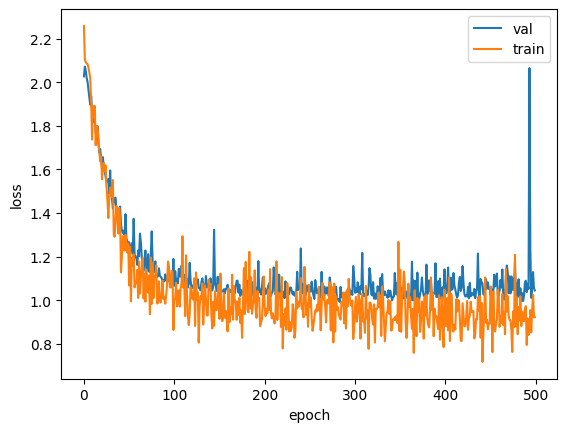

val_loss: tensor(1.0450)
train_loss: tensor(0.9226)


In [17]:
model = MyNet(lr = 0.01, p = 0.3)
training(model)

In [34]:
def trainings(model, optimizer, criterion, scheduler, train_dataloader = train_dataloader, val_dataloader = val_dataloader, n_epochs = n_epochs):
  seed_everything(12345)
  val_losses = []
  train_losses = []
  for epoch in tqdm(range(n_epochs)):
      model.train()
      for x, y in train_dataloader:
        #print(x)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
      if scheduler:
        scheduler.step()

      model.eval()
      with torch.no_grad():
        for x, y in val_dataloader:
          l = criterion(model(x), y)

      train_losses.append(loss.data)
      val_losses.append(l.data)
  plot(val_losses, train_losses)
  print('val_loss:', val_losses[-1])
  print('train_loss:', train_losses[-1])

#Добавим шедулер,  дропаут с p=0.2

100%|██████████| 500/500 [00:11<00:00, 43.01it/s]


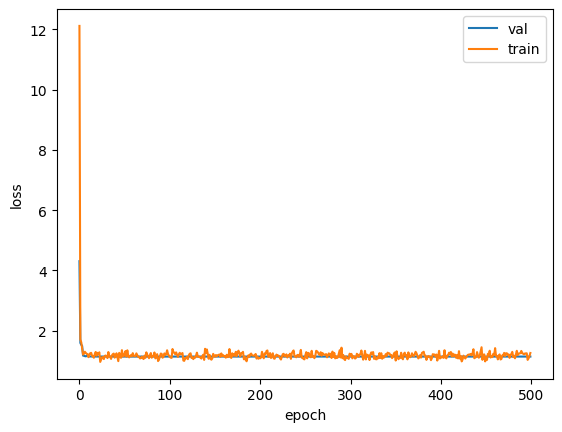

val_loss: tensor(1.1435)
train_loss: tensor(1.2618)


In [25]:
model = nn.Sequential(nn.Linear(11, 200), nn.LeakyReLU(), nn.Dropout(0.2), nn.Linear(200, 10))
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
lambda1 = lambda epoch: 0.8 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, scheduler)

#только шедулер:

100%|██████████| 500/500 [00:12<00:00, 39.45it/s]


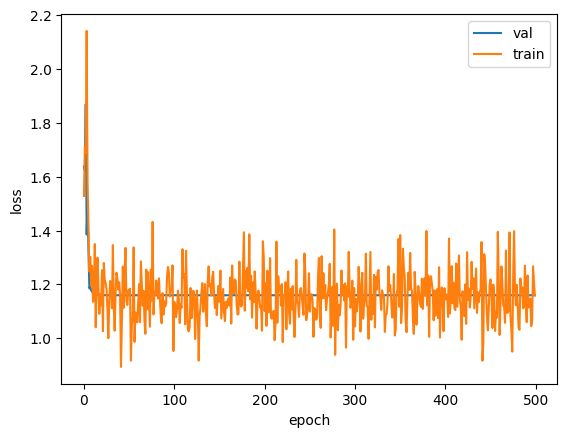

val_loss: tensor(1.1599)
train_loss: tensor(1.1595)


In [20]:
model = nn.Sequential(nn.Linear(11, 500), nn.LeakyReLU(), nn.Linear(500, 10))
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
lambda1 = lambda epoch: 0.8 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, scheduler)

#Только дропаут:

100%|██████████| 500/500 [00:10<00:00, 46.19it/s]


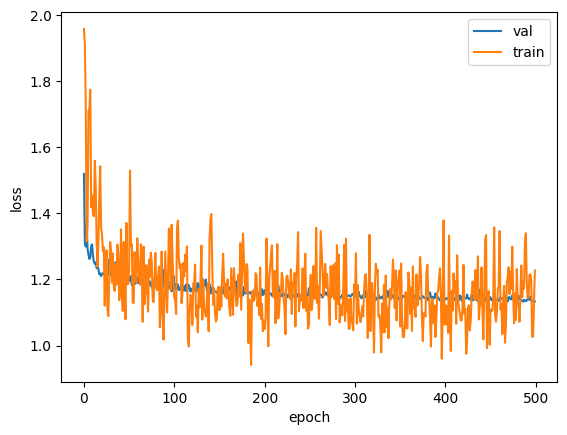

val_loss: tensor(1.1331)
train_loss: tensor(1.2271)


In [21]:
model = nn.Sequential(nn.Linear(11, 100), nn.LeakyReLU(), nn.Dropout(0.2), nn.Linear(100, 10))
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#lambda1 = lambda epoch: 0.8 ** epoch
#scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, False)

#AdamW вместо SGD с количеством нейронов 100, поскольку пошло переобучение

100%|██████████| 500/500 [00:14<00:00, 33.36it/s]


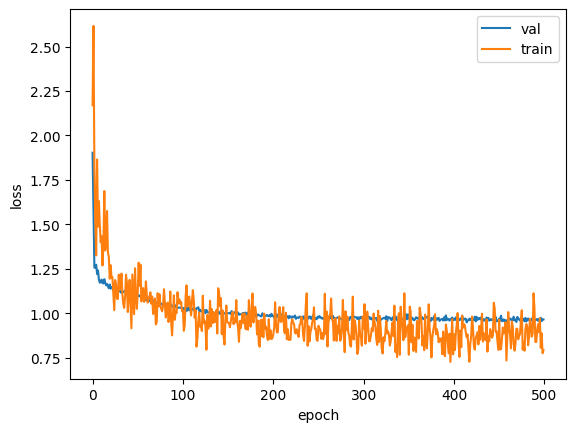

val_loss: tensor(0.9650)
train_loss: tensor(0.7921)


In [22]:
model = nn.Sequential(nn.Linear(11, 100), nn.LeakyReLU(), nn.Dropout(0.2), nn.Linear(100, 10))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, False)

#batchnorm:

100%|██████████| 500/500 [00:18<00:00, 26.69it/s]


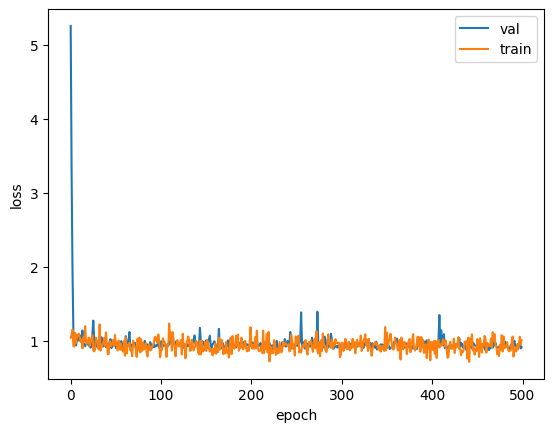

val_loss: tensor(0.9141)
train_loss: tensor(1.0078)


In [23]:
model = nn.Sequential(nn.Linear(11, 50), nn.LeakyReLU(), nn.BatchNorm1d(50), nn.Linear(50, 10))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)
lambda1 = lambda epoch: 0.8 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, False)

Добавим standard scaler:

100%|██████████| 500/500 [00:15<00:00, 32.66it/s]


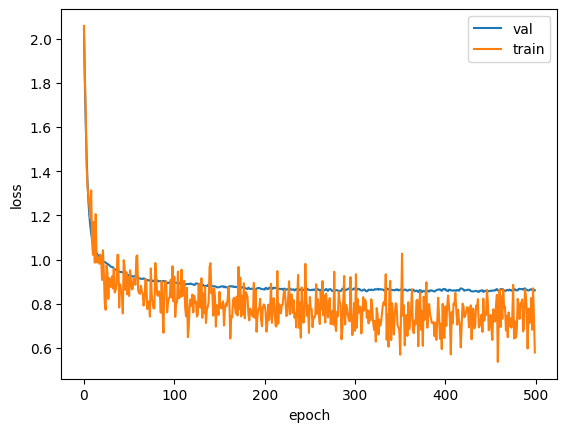

val_loss: tensor(0.8606)
train_loss: tensor(0.5795)


In [27]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

x_train_scaled = torch.tensor(x_train_scaled, dtype=torch.float32)
x_test_scaled = torch.tensor(x_test_scaled, dtype=torch.float32)

train_dataset_sc = MyDataset(x_train_scaled, y_train)
test_dataset_sc = MyDataset(x_test_scaled, y_test)

train_dataloader_sc = DataLoader(train_dataset_sc, batch_size=128, shuffle=True)
val_dataloader_sc = DataLoader(test_dataset_sc, batch_size=128, shuffle=False)


model = nn.Sequential(nn.Linear(11, 100), nn.LeakyReLU(), nn.Dropout(0.2), nn.Linear(100, 10))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, False, train_dataloader_sc, val_dataloader_sc)

with scheduler:

100%|██████████| 500/500 [00:16<00:00, 30.84it/s]


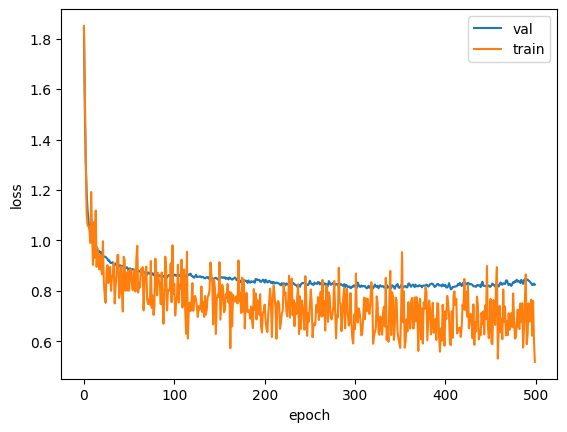

val_loss: tensor(0.8250)
train_loss: tensor(0.5187)


In [61]:
model = nn.Sequential(nn.Linear(11, 100), nn.LeakyReLU(), nn.Dropout(0.25), nn.Linear(100, 10))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.002)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, scheduler, train_dataloader_sc, val_dataloader_sc)

#batchnorm:

100%|██████████| 600/600 [00:17<00:00, 34.91it/s]


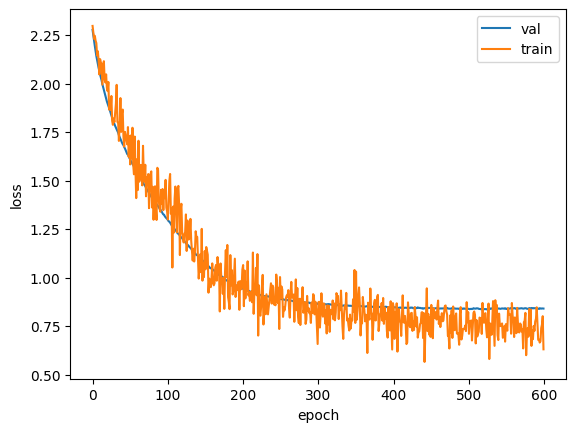

val_loss: tensor(0.8402)
train_loss: tensor(0.6301)


In [39]:
model = nn.Sequential(nn.Linear(11, 100), nn.LeakyReLU(), nn.BatchNorm1d(100), nn.Linear(100, 10))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
trainings(model, optimizer, criterion, scheduler, train_dataloader_sc, val_dataloader_sc, 600)

Не в зависимости от того что тебе удалось сделать , скажи пару слов о том, в чём ты смог разобраться (если такие открытия были) и о том, какие изменения / дополнения и почему ты привнёс в заготовленный нами шаблон.

Я добавляла dropout (в нем меняла p), batchnorm, размер шага и батча, оптимизаторы, добавляла шедулеры. Значительно помогла уменьшить ошибку стандартизация.

В целом, задания мне знакомы, поскольку я проходила полносвязные нейронные сети осенью в ходе обучения на майноре ИАД.

Лучшей моделью является:
model = nn.Sequential(nn.Linear(11, 100), nn.LeakyReLU(), nn.Dropout(0.25), nn.Linear(100, 10))
с шедулером, AdamW. Удалось добиться val_loss: 0.8250 и
train_loss: 0.5187